In [ ]:
!pip install --upgrade scikit-learn
import sklearn
print(sklearn.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 22.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
1.5.1


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error


import pickle

In [6]:
from google.colab import drive

#drive.flush_and_unmount()

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Abalone Prediction/Dataset/train.csv')

test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Abalone Prediction/Dataset/test.csv')

In [ ]:
train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [ ]:
train.dtypes

In [ ]:
null_values = train.isnull().sum()
print(null_values)

#preprocessing


In [ ]:

def preprocess(df):

    return df.assign(Sex=df['Sex'].map({'M': 1, 'F': 2, 'I': 0}))


train_encoded = preprocess(train)
test_encoded = preprocess(test)

In [ ]:

train_encoded.to_csv('/content/drive/My Drive/Colab Notebooks/Abalone Prediction/Dataset/Encoded dataset/train_encoded.csv', index=False);
test_encoded.to_csv('/content/drive/My Drive/Colab Notebooks/Abalone Prediction/Dataset/Encoded dataset/test_encoded.csv', index=False);

Importing preprocessed dataset

In [7]:

train_encoded = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Abalone Prediction/Dataset/Encoded dataset/train_encoded.csv')
test_encoded = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Abalone Prediction/Dataset/Encoded dataset/test_encoded.csv')


In [ ]:
train_encoded.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,2,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,2,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,0,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,1,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,0,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


#Descriptive statistics

In [ ]:

summary_stats = train_encoded.describe()

print(summary_stats)

                 id           Sex        Length      Diameter        Height  \
count  90615.000000  90615.000000  90615.000000  90615.000000  90615.000000   
mean   45307.000000      0.927186      0.517098      0.401679      0.135464   
std    26158.441658      0.807651      0.118217      0.098026      0.038008   
min        0.000000      0.000000      0.075000      0.055000      0.000000   
25%    22653.500000      0.000000      0.445000      0.345000      0.110000   
50%    45307.000000      1.000000      0.545000      0.425000      0.140000   
75%    67960.500000      2.000000      0.600000      0.470000      0.160000   
max    90614.000000      2.000000      0.815000      0.650000      1.130000   

       Whole weight  Whole weight.1  Whole weight.2  Shell weight  \
count  90615.000000    90615.000000    90615.000000  90615.000000   
mean       0.789035        0.340778        0.169422      0.225898   
std        0.457671        0.204428        0.100909      0.130203   
min        0

Correlation analysis

In [8]:

correlation_matrix = train_encoded.corr()
print(correlation_matrix)


                      id       Sex    Length  Diameter    Height  \
id              1.000000  0.006248  0.004724  0.004290  0.005916   
Sex             0.006248  1.000000  0.597219  0.605122  0.591682   
Length          0.004724  0.597219  1.000000  0.989732  0.916094   
Diameter        0.004290  0.605122  0.989732  1.000000  0.919618   
Height          0.005916  0.591682  0.916094  0.919618  1.000000   
Whole weight    0.005228  0.595995  0.931449  0.933848  0.902344   
Whole weight.1  0.004203  0.562399  0.909609  0.908466  0.861769   
Whole weight.2  0.004878  0.594244  0.913134  0.914668  0.886132   
Shell weight    0.005887  0.595952  0.911073  0.917871  0.904019   
Rings           0.000938  0.474908  0.623786  0.636832  0.665772   

                Whole weight  Whole weight.1  Whole weight.2  Shell weight  \
id                  0.005228        0.004203        0.004878      0.005887   
Sex                 0.595995        0.562399        0.594244      0.595952   
Length           

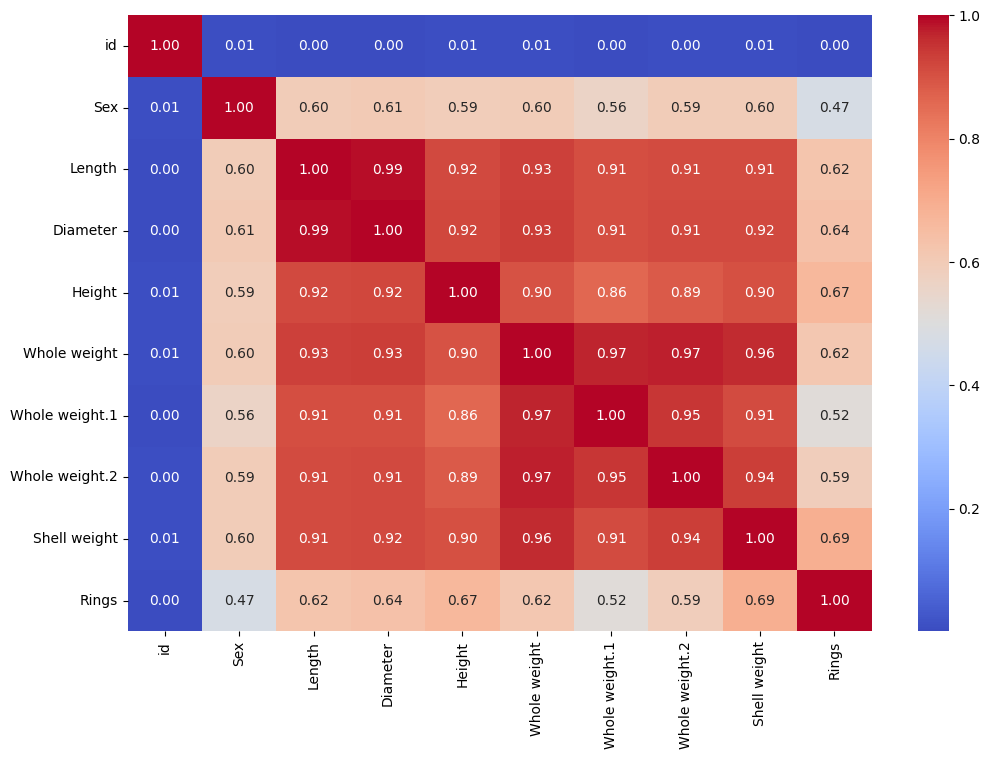

In [9]:
plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

#Visualizations

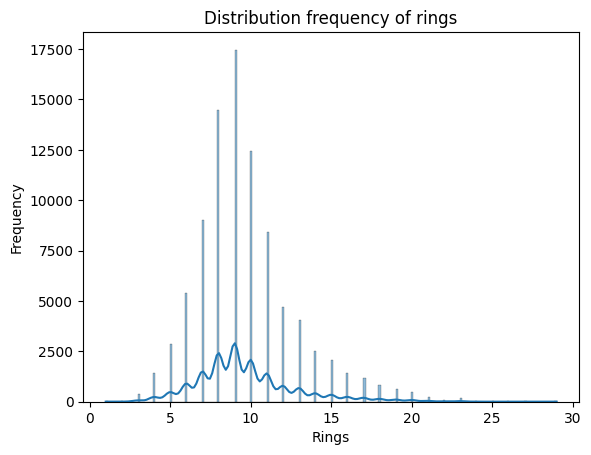

In [10]:
sns.histplot(train_encoded['Rings'], kde=True)
plt.title('Distribution frequency of rings')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.show()


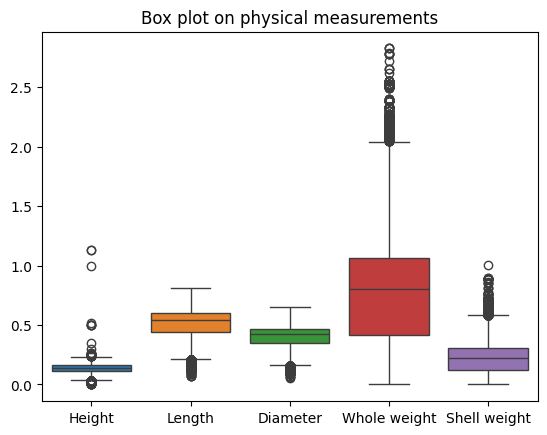

In [11]:
sns.boxplot(data=train_encoded[['Height', 'Length', 'Diameter', 'Whole weight', 'Shell weight']])
plt.title('Box plot on physical measurements')
plt.show()

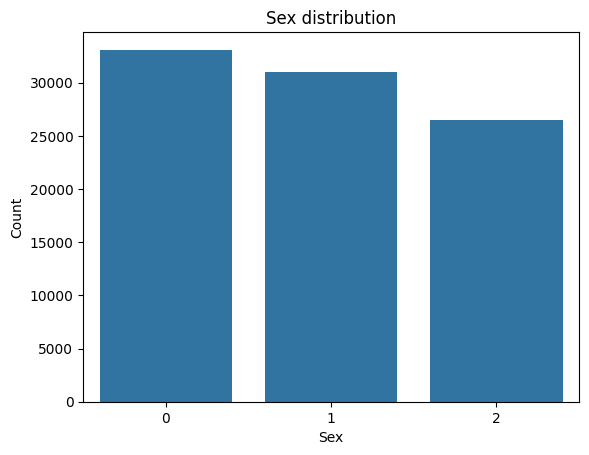

In [12]:
sns.countplot(x='Sex', data=train_encoded)
plt.title('Sex distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


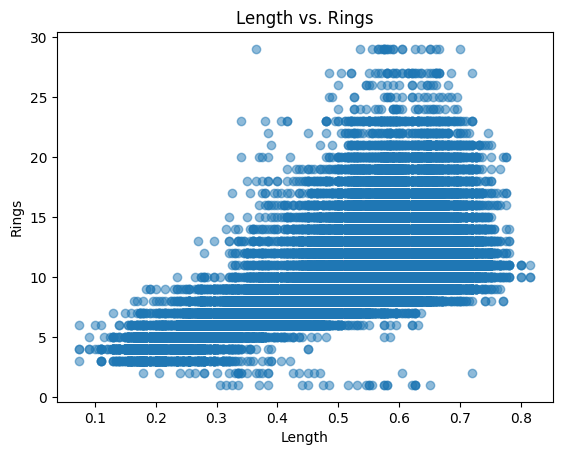

In [13]:

plt.scatter(train_encoded['Length'], train_encoded['Rings'], alpha=0.5)
plt.title('Length vs. Rings')
plt.xlabel('Length')
plt.ylabel('Rings')
plt.show()


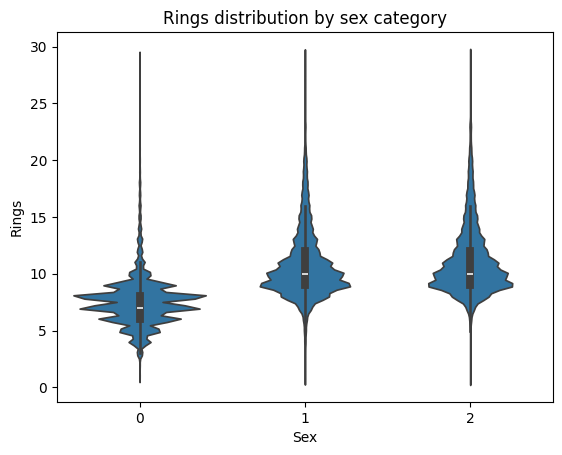

In [14]:

sns.violinplot(x='Sex', y='Rings', data=train_encoded)
plt.title('Rings distribution by sex category')
plt.show()

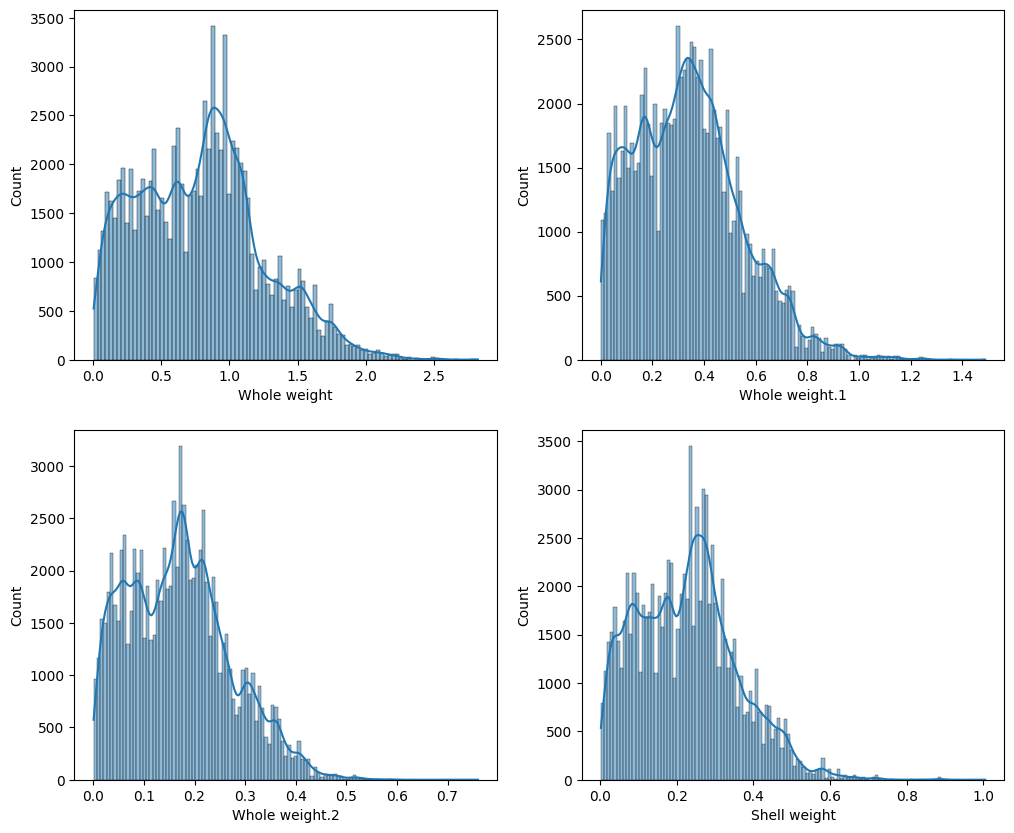

In [15]:


fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(train_encoded['Whole weight'], kde=True, ax=axs[0, 0])
sns.histplot(train_encoded['Whole weight.1'], kde=True, ax=axs[0, 1])
sns.histplot(train_encoded['Whole weight.2'], kde=True, ax=axs[1, 0])
sns.histplot(train_encoded['Shell weight'], kde=True, ax=axs[1, 1])
plt.show()


#Modelling

In [ ]:

X_train = train_encoded.drop(columns=['id', 'Rings'])
y_train = train_encoded['Rings']


In [ ]:

# dt model intitated with tuning
decision_tree_tuned = DecisionTreeRegressor(
    max_depth=10,
    min_samples_leaf=5,
    random_state=42
)


decision_tree_tuned.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, random_state=42)

In [ ]:


train_predictions = decision_tree_tuned.predict(X_train)
rmsle_train = mean_squared_log_error(y_train, train_predictions, squared=False)

print(f'RMSLE on training data: {rmsle_train}')

RMSLE on training data: 0.146805669250163


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:675: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(


In [ ]:


X_test = test_encoded.drop(columns=['id'])
test_predictions = decision_tree_tuned.predict(X_test)



#Exporting

In [ ]:

submission = pd.DataFrame({
    'id': test_encoded['id'],
    'Rings': test_predictions
})

submission.to_csv('/content/drive/My Drive/Colab Notebooks/Abalone Prediction/Submissions/dt_tuned.csv', index=False)

print('Submission file created: dt_tuned.csv')


Submission file created: dt_tuned.csv


In [ ]:

with open('/content/drive/My Drive/Colab Notebooks/Abalone Prediction/Pickle/dt_tuned.pkl', 'wb') as file:
    pickle.dump(decision_tree_tuned, file)

print('Model saved as: dt_tuned.pkl')

Model saved as: dt_tuned.pkl
